# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)


In [3]:
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
type(cities)

list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


str

In [8]:
# set up lists to hold reponse info
lat = []
temp = []
hum = []
long = []
wind = []
date = []
country = []
city_found =[]
cloudiness = []

# Loop through the list of cities and perform a request for data on each - 
for i in cities:
    response = requests.get(query_url + i).json()
    try: 
        humidity = response['main']['humidity']
        hum.append(humidity)
        temperature = response['main']['temp_max']
        temp.append(temperature)
        latitude = response['coord']['lat']
        lat.append(latitude)
        longitude = response['coord']['lon']
        long.append(longitude)
        windspeed = response['wind']['speed']
        wind.append(windspeed)
        dt = response['dt']
        date.append(dt)
        countrycode = response['sys']['country']
        country.append(countrycode)
        cityf = response['name']
        city_found.append(cityf)
        cloud = response['clouds']['all']
        cloudiness.append(cloud)
        print("Processing record " + str(cities.index(i)) + ":" + i)
    except KeyError:
        print("City not found...skipping " + i)

Processing record 0:hambantota
Processing record 1:mataura
Processing record 2:tatvan
City not found...skipping amderma
Processing record 4:ponta delgada
Processing record 5:egvekinot
Processing record 6:cherskiy
Processing record 7:port alfred
Processing record 8:karpathos
Processing record 9:talas
Processing record 10:rikitea
Processing record 11:ambilobe
Processing record 12:punta arenas
Processing record 13:te anau
Processing record 14:hobart
Processing record 15:nikolskoye
Processing record 16:new norfolk
Processing record 17:elko
Processing record 18:flinders
Processing record 19:virginia beach
Processing record 20:torbay
Processing record 21:thompson
Processing record 22:jalingo
Processing record 23:arraial do cabo
Processing record 24:rocha
Processing record 25:puerto ayora
Processing record 26:leh
Processing record 27:dudinka
Processing record 28:sinnamary
City not found...skipping taolanaro
Processing record 30:komsomolskiy
Processing record 31:saskylakh
Processing record 32:

KeyboardInterrupt: 

In [8]:
len(city_found)

552

,city,country,max temp,humidity,latitude,longitude,wind speed,date
0,Beaverlodge,CA,-1.00,80,55.21,-119.43,2.6,1574278425
1,Bambous Virieux,MU,25.00,94,-20.34,57.76,1.5,1574278425
2,Ribeira Grande,PT,17.00,93,38.52,-28.70,4.6,1574278425
3,Palmer,AU,22.22,68,-34.85,139.16,11.8,1574278425
4,Avarua,CK,26.00,74,-21.21,-159.78,3.6,1574278425


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_found,
    "country": country,
    "max temp": temp,
    "humidity": hum,
    "latitude": lat,
    "longitude": long,
    "wind speed": wind,
    "date": date,
    "cloudiness": cloudiness
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,country,max temp,humidity,latitude,longitude,wind speed,date,cloudiness
0,Yerbogachen,RU,-24.94,96,61.28,108.01,1.72,1574284265,100
1,Mastic Beach,US,7.22,75,40.77,-72.85,6.20,1574284052,90
2,Oranjestad,AW,30.00,70,12.52,-70.03,5.10,1574284087,20
3,Victoria,BN,24.00,88,5.28,115.24,2.10,1574284265,75
4,Katsuura,JP,8.00,70,33.93,134.50,3.60,1574284265,75


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

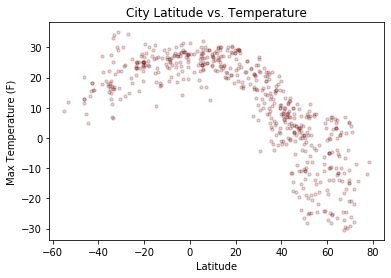

In [14]:
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.2)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

In [16]:
len(humidty)

552

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

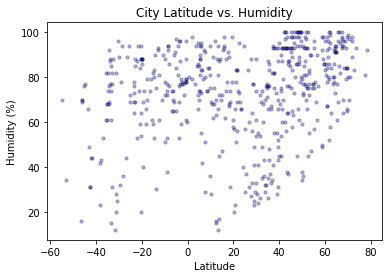

In [18]:
plt.scatter(lat, hum, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.3)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

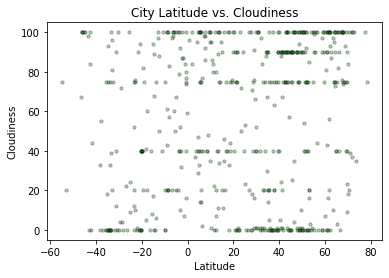

In [19]:
plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors="black",
            s=10, alpha=0.3)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

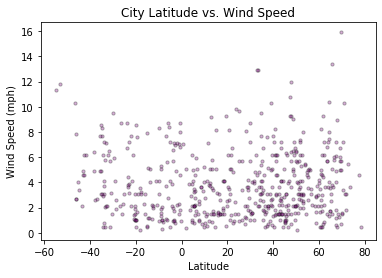

In [20]:
plt.scatter(lat, wind, marker="o", facecolors="purple", edgecolors="black",
            s=10, alpha=0.3)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")